In [15]:
# --- 1. Imports và Cài đặt ban đầu ---
%matplotlib inline 
# Sử dụng 'inline' để các biểu đồ hiển thị lần lượt, tránh chồng chéo. 
# Bạn có thể đổi lại thành 'widget' nếu muốn các biểu đồ tương tác.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm
import statsmodels.api as sm 
import random # Cần thiết cho việc chọn ngẫu nhiên

# Cài đặt seed để kết quả có thể tái tạo
np.random.seed(0)


In [ ]:

n_samples = 500
n_features = 5
n_simulations = 3000 
std_noise_data = 10

n_signal_features = 2
beta_true_values = np.zeros(n_features) 


intercept_true = 2
beta_true_full = np.concatenate([[intercept_true], beta_true_values])

X_raw_no_intercept = np.random.normal(0, 1, size=(n_samples, n_features))
X_with_intercept = sm.add_constant(X_raw_no_intercept, prepend=True) 



def create_data_with_signal_ols(X_input_with_intercept, true_betas_with_intercept, std_noise):

    n_s = X_input_with_intercept.shape[0]
    linear_component = X_input_with_intercept @ true_betas_with_intercept
    noise = np.random.normal(0, std_noise, size=n_s)
    y = linear_component + noise
    return y

def fit_ols_model(X_data_with_intercept, y_data):
    model = sm.OLS(y_data, X_data_with_intercept)
    results = model.fit()
    beta_hat_ols = results.params
    p_values_ols = results.pvalues
    f_pvalue_overall = results.f_pvalue
    return beta_hat_ols, p_values_ols, f_pvalue_overall



beta_hat_list = []
p_values_list = []
f_pvalues_list = []
randomly_selected_pvalues_list = [] 

print(f"Bắt đầu chạy {n_simulations} lần mô phỏng...")

for i in range(n_simulations):

    current_y = create_data_with_signal_ols(X_with_intercept, beta_true_full, std_noise_data)

    beta_hat, p_values, f_pvalue = fit_ols_model(X_with_intercept, current_y)

    beta_hat_list.append(beta_hat)
    p_values_list.append(p_values)
    f_pvalues_list.append(f_pvalue)

    p_values_for_betas = p_values[1:]
    selected_p = random.choice(p_values_for_betas) 
    randomly_selected_pvalues_list.append(selected_p) 

print("Hoàn thành mô phỏng.\n")



Bắt đầu chạy 3000 lần mô phỏng...
Đã hoàn thành simulation 500/3000
Đã hoàn thành simulation 1000/3000
Đã hoàn thành simulation 1500/3000
Đã hoàn thành simulation 2000/3000
Đã hoàn thành simulation 2500/3000
Đã hoàn thành simulation 3000/3000
Hoàn thành mô phỏng.



--- Kết quả ước lượng Beta ---
Trung bình các Beta_hat ước lượng:
Intercept    2.011
Beta_X1      0.001
Beta_X2      0.008
Beta_X3      0.008
Beta_X4      0.009
Beta_X5     -0.009
dtype: float64

Giá trị Beta_true (để so sánh):
[2. 0. 0. 0. 0. 0.]
-----------------------------------

Đang vẽ biểu đồ phân phối p-value cho từng hệ số...


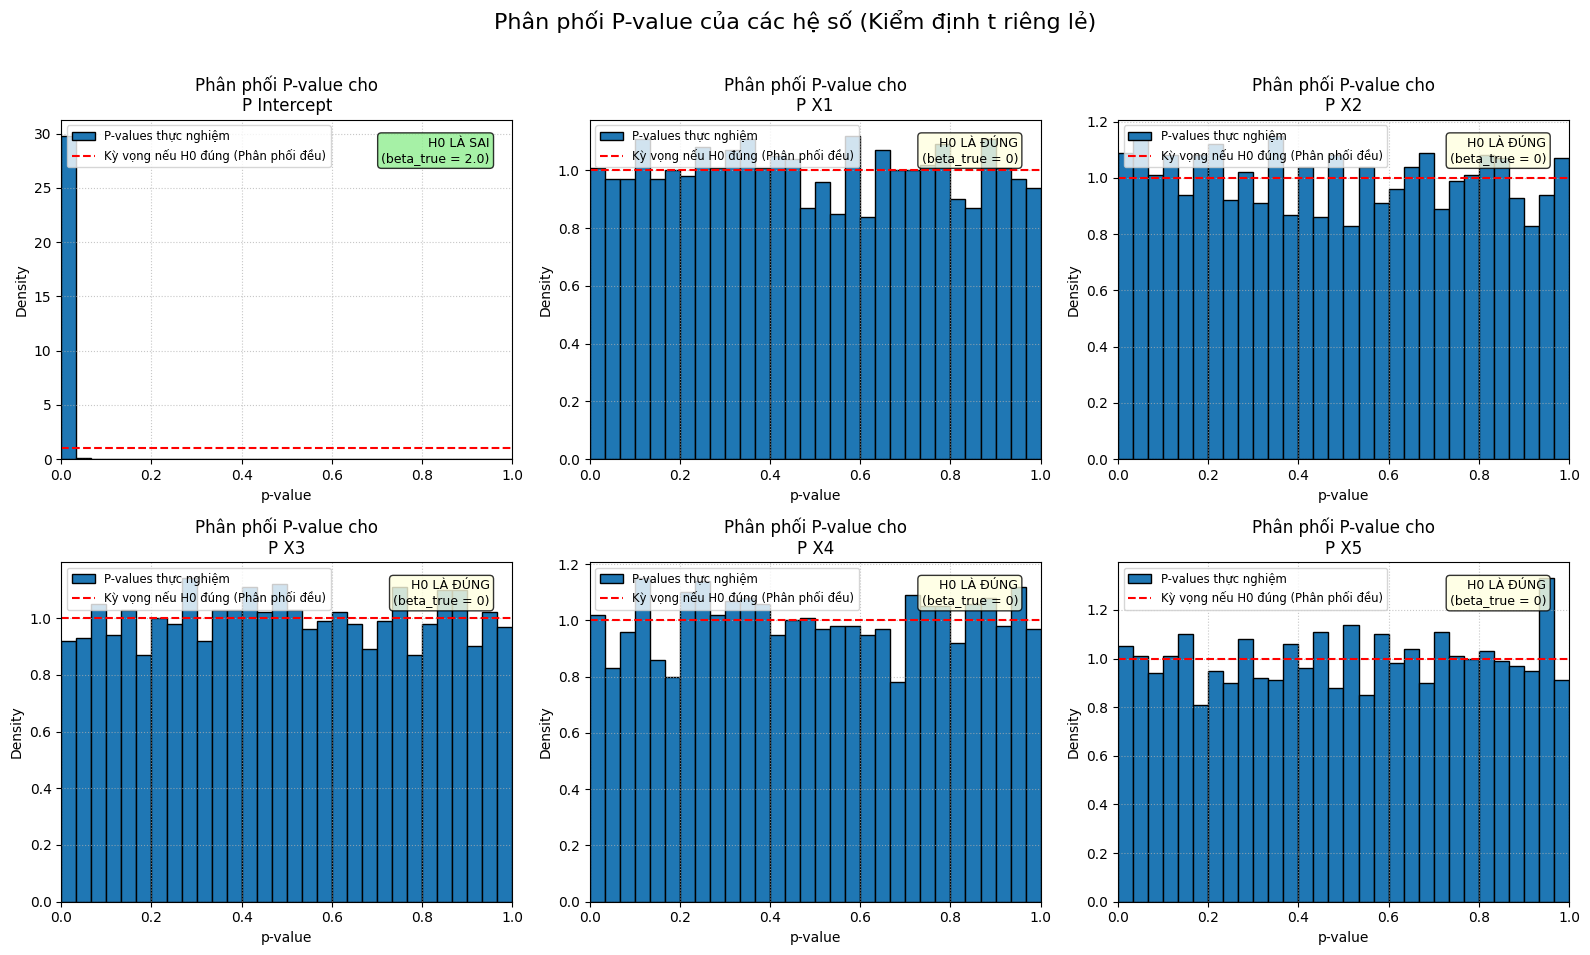

In [ ]:

# --- 5. Xử lý và Trực quan hóa kết quả ---

# Chuyển đổi list thành DataFrame để dễ phân tích
columns_beta = ['Intercept'] + [f'Beta_X{i+1}' for i in range(n_features)]
columns_pvalue = ['P_Intercept'] + [f'P_X{i+1}' for i in range(n_features)]
beta_hat_df = pd.DataFrame(beta_hat_list, columns=columns_beta)
pvalues_df = pd.DataFrame(p_values_list, columns=columns_pvalue)

# In kết quả tóm tắt
print("--- Kết quả ước lượng Beta ---")
print("Trung bình các Beta_hat ước lượng:")
print(beta_hat_df.mean().round(3))
print("\nGiá trị Beta_true (để so sánh):")
print(beta_true_full.round(3))
print("-" * 35 + "\n")



In [ ]:

# --- Biểu đồ 1: Phân phối P-value cho từng hệ số (t-test) ---
fig_p, axes_p = plt.subplots(2, 3, figsize=(16, 10))
axes_p = axes_p.flatten()

for idx, col_name in enumerate(columns_pvalue):
    if idx < len(axes_p):
        ax = axes_p[idx]
        ax.hist(pvalues_df[col_name], bins=30, edgecolor='black', density=True, range=(0,1), label='P-values thực nghiệm')
        ax.axhline(1, color='red', linestyle='--', label='Kỳ vọng nếu H0 đúng (Phân phối đều)')
        ax.set_title(f'Phân phối P-value cho\n{col_name.replace("_", " ")}')
        ax.set_xlabel('p-value')
        ax.set_ylabel('Density')
        ax.set_xlim(0, 1)
        ax.grid(True, linestyle=':', alpha=0.7)

        true_beta_for_this_coeff = beta_true_full[idx]
        ax.legend(loc='upper left', fontsize='small')

for i in range(len(columns_pvalue), len(axes_p)):
    fig_p.delaxes(axes_p[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()



Đang vẽ biểu đồ phân phối p-value của F-test tổng thể...


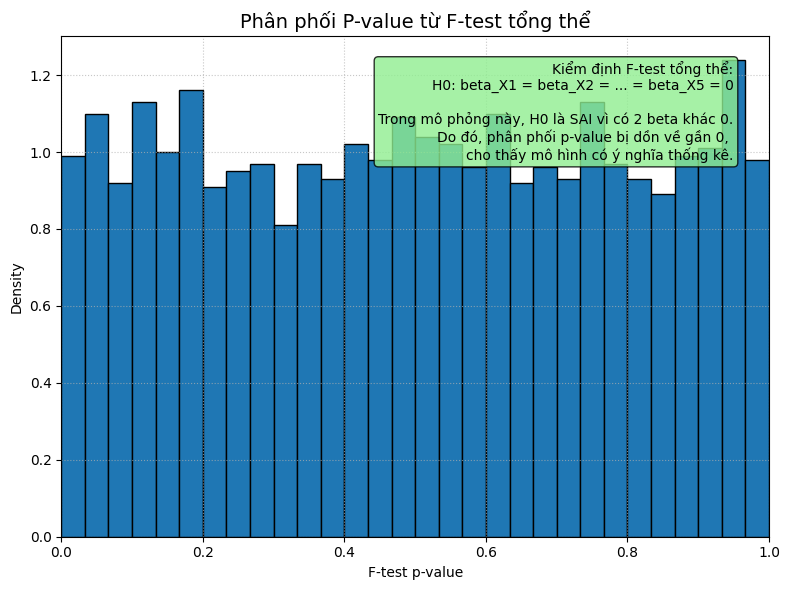

In [ ]:

fig_f, ax_f = plt.subplots(figsize=(8, 6))
ax_f.hist(f_pvalues_list, bins=30, edgecolor='black', density=True, range=(0,1))
ax_f.set_title('Phân phối P-value từ F-test tổng thể', fontsize=14)
ax_f.set_xlabel('F-test p-value')
ax_f.set_ylabel('Density')
ax_f.set_xlim(0, 1)
ax_f.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


Đang vẽ biểu đồ phân phối p-value được chọn ngẫu nhiên...


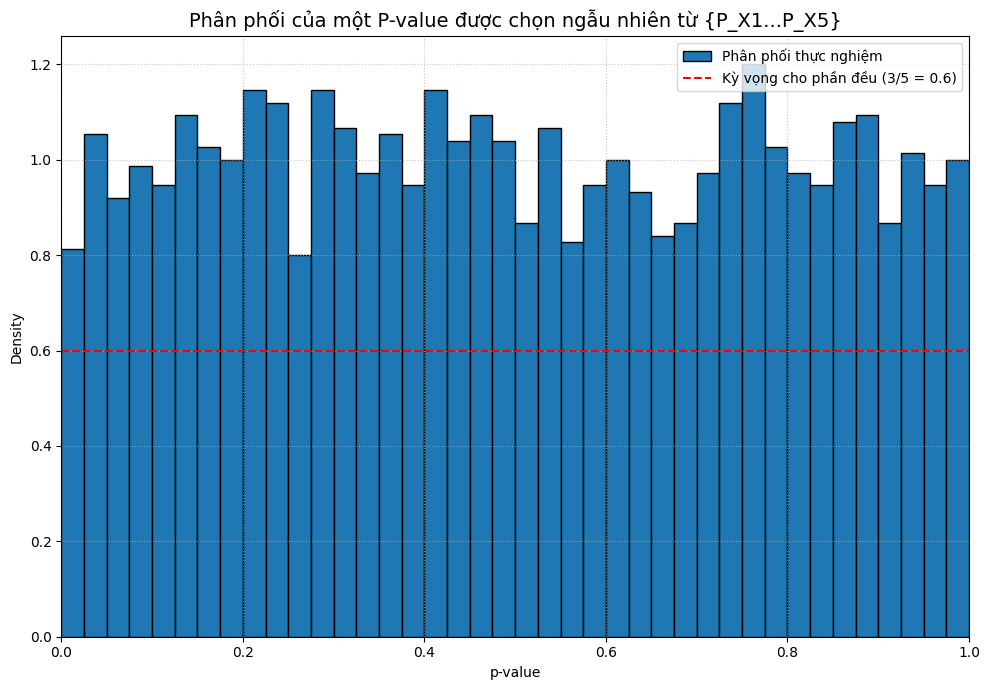

In [ ]:


print("Đang vẽ biểu đồ phân phối p-value được chọn ngẫu nhiên...")
fig_rand, ax_rand = plt.subplots(figsize=(10, 7))

ax_rand.hist(randomly_selected_pvalues_list, bins=40, edgecolor='black', density=True,
             range=(0,1), label='Phân phối thực nghiệm')

n_noise_features = n_features - n_signal_features
expected_density_uniform_part = n_noise_features / n_features
ax_rand.axhline(expected_density_uniform_part, color='red', linestyle='--',
                label=f'Kỳ vọng cho phần đều ({n_noise_features}/{n_features} = {expected_density_uniform_part:.1f})')

ax_rand.set_title('Phân phối của một P-value được chọn ngẫu nhiên từ {P_X1...P_X5}', fontsize=14)
ax_rand.set_xlabel('p-value')
ax_rand.set_ylabel('Density')
ax_rand.set_xlim(0, 1)
ax_rand.set_ylim(bottom=0)
ax_rand.grid(True, linestyle=':', alpha=0.7)
ax_rand.legend()


plt.tight_layout()
plt.show()